ML - Project - Phase 1
====
- Ahmed Soliman - 201802284
- Abhygian Kishor - 201909552
- Mohammed Arif - 201908981

#- Introduction
=======

# Motivation

Customers cancel hotel reservations (or simply don't show up) due to a variety of reasons such as scheduling conflicts, change of plans, etc. Knowing if a customer will honor a reservation is hard and with the advent of online reservations for hotels, prediciting this behaivour has become an even more difficult task. Reservation cancellation leads to unfilled rooms which means hotels lose out on revenue.

Analysing the resevation cancellation dataset is crucial step in understanding and making sense of the large amount of data to efficiently predict reservation cancellations. Predicting this customer behaviour will provide hotels several benefits such as better revenue optimization, increased customer staisfaction, and accurate forecasting of demand.

Objectives
====
1 - By producing insightful summary statistics and visualization we aim to uncover patterns and insights on some of the reasons why customers may cancel.

2 - We also aim to investigate relations in different attributes of the dataset to gain a deeper understanding of the data.

3 - We aim to set expectations for future improvements and developments in understanding customer behaviour through establishing a baseline performance by training intial models such as Decision Trees, Random Forest, K-Nearest Neighbours and Logistic Regression.


Dataset 
====
### Link : https://www.kaggle.com/competitions/playground-series-s3e7/overview
The dataset contains the different attributes of customers' reservation details. The detailed data dictionary is given below:
* Booking_ID: unique identifier of each booking
* No of adults: Number of adults
* No of children: Number of Children
* noofweekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* noofweek_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* typeofmeal_plan: Type of meal plan booked by the customer:
* requiredcarparking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* roomtypereserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* Market segment type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* noofprevious_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* noofpreviousbookingsnot_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avgpriceper_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* noofspecial_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not. (0 - Cancelled, 1 - Not Cancelled)


#- Implementations
=======

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
from sklearn import preprocessing
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
np.random.seed(1)

### Getting training dataset from csv files

In [2]:
train = pd.read_csv('./playground-series-s3e7/train.csv').drop(columns='id')
test = pd.read_csv('./playground-series-s3e7/test.csv').drop(columns='id')
train.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

Data statistics
====


In [3]:
#Using Python statistics Module: Mathematical statistics functions in Python
from statistics import *
import pandas as pd
data = train['booking_status']
# print(sorted(data))
print("Min", data.min())
print("Max", data.max())
print("mean",mean(data))
print("median",median(data)) 
print("mode",mode(data)) #Single mode (most common value) of discrete or nominal data.
print("multimode",multimode(data)) #List of modes (most common values) of discrete or nominal data.
print("quantiles",quantiles(data)) #Divide data into intervals with equal probability
print("variance",variance(data)) #sample variance of data
print("std",stdev(data))  #sample standard deviation
print("Value counts: \n", data.value_counts())


train.describe(include='all')

Min 0
Max 1
mean 0.3920190023752969
median 0.0
mode 0
multimode [0]
quantiles [0.0, 0.0, 1.0]
variance 0.23834576557158363
std 0.4882066832516569
Value counts: 
 0    25596
1    16504
Name: booking_status, dtype: int64


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000,42100.000000
mean,1.920713,0.141093,0.884632,2.398005,0.239192,0.025249,0.428931,103.888029,2017.856295,7.593539,15.902945,0.728504,0.029192,0.019715,0.175772,104.566377,0.571734,0.392019
std,0.524950,0.450128,0.885693,1.427330,0.587674,0.156884,0.832605,81.069343,0.350795,2.829395,8.888582,0.633529,0.168347,0.325837,1.732121,37.139165,0.775041,0.488207
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,37.000000,2018.000000,6.000000,8.000000,0.000000,0.000000,0.000000,0.000000,80.000000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,93.000000,2018.000000,8.000000,16.000000,1.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,1.000000,155.000000,2018.000000,10.000000,24.000000,1.000000,0.000000,0.000000,0.000000,123.300000,1.000000,1.000000
max,4.000000,9.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


## Plotting non-continuous attributes with booking status

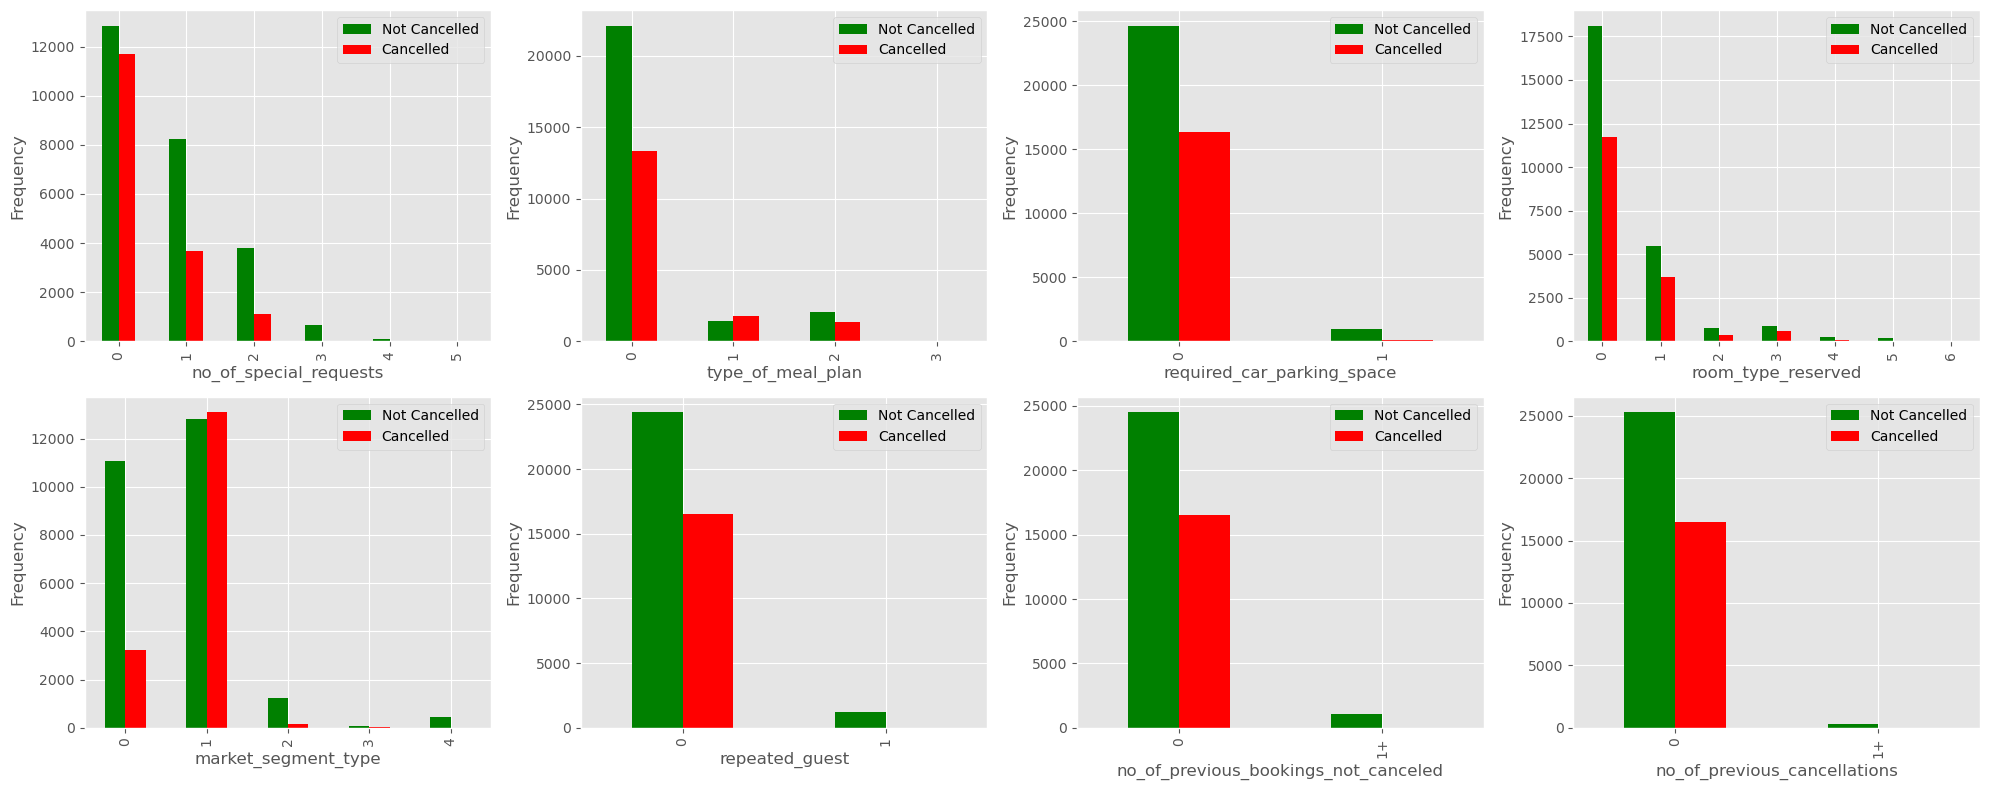

In [4]:

non_continuous = ['no_of_special_requests','type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved',
               'market_segment_type', 'repeated_guest', 'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations' ] 



nrows = int(np.ceil(len(non_continuous)/4))

# create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*4))

for i, attr in enumerate(non_continuous):
    row = i // 4
    col = i % 4
    ax=axes[row,col]
    cross_tab = pd.crosstab(train[attr], train['booking_status'])
    if(attr == 'no_of_previous_bookings_not_canceled' or attr == 'no_of_previous_cancellations'):
            #These attributes have too many non zero values, generalising into '0' and '1 or more'
            cross_tab = pd.crosstab(train[attr].apply(lambda x: '0' if x == 0 else '1+'), train['booking_status'])
    cross_tab.plot(kind='bar', ax=ax, color='gr')
    ax.set_xlabel(attr)
    ax.set_ylabel('Frequency')
    ax.legend(["Not Cancelled", "Cancelled"])
    
plt.tight_layout()
plt.show()


**From the above graphs we can see the following relationships:**

* People who made special requests (maybe a good view, or special decorations) did not cancel as much as people who did not make any requests. We can see that as the number of  requests goes up the ratio of cancellations goes down significantly.

* Repeated guests also had very low cancellations compared to first time guests. As the number of previous bookings not cancelled and the number of previous cancellations are only possible for repeated guests, these attributes are also inversely proportional to the booking status.

Data visualization - seaborn
====

## 1- boxplots


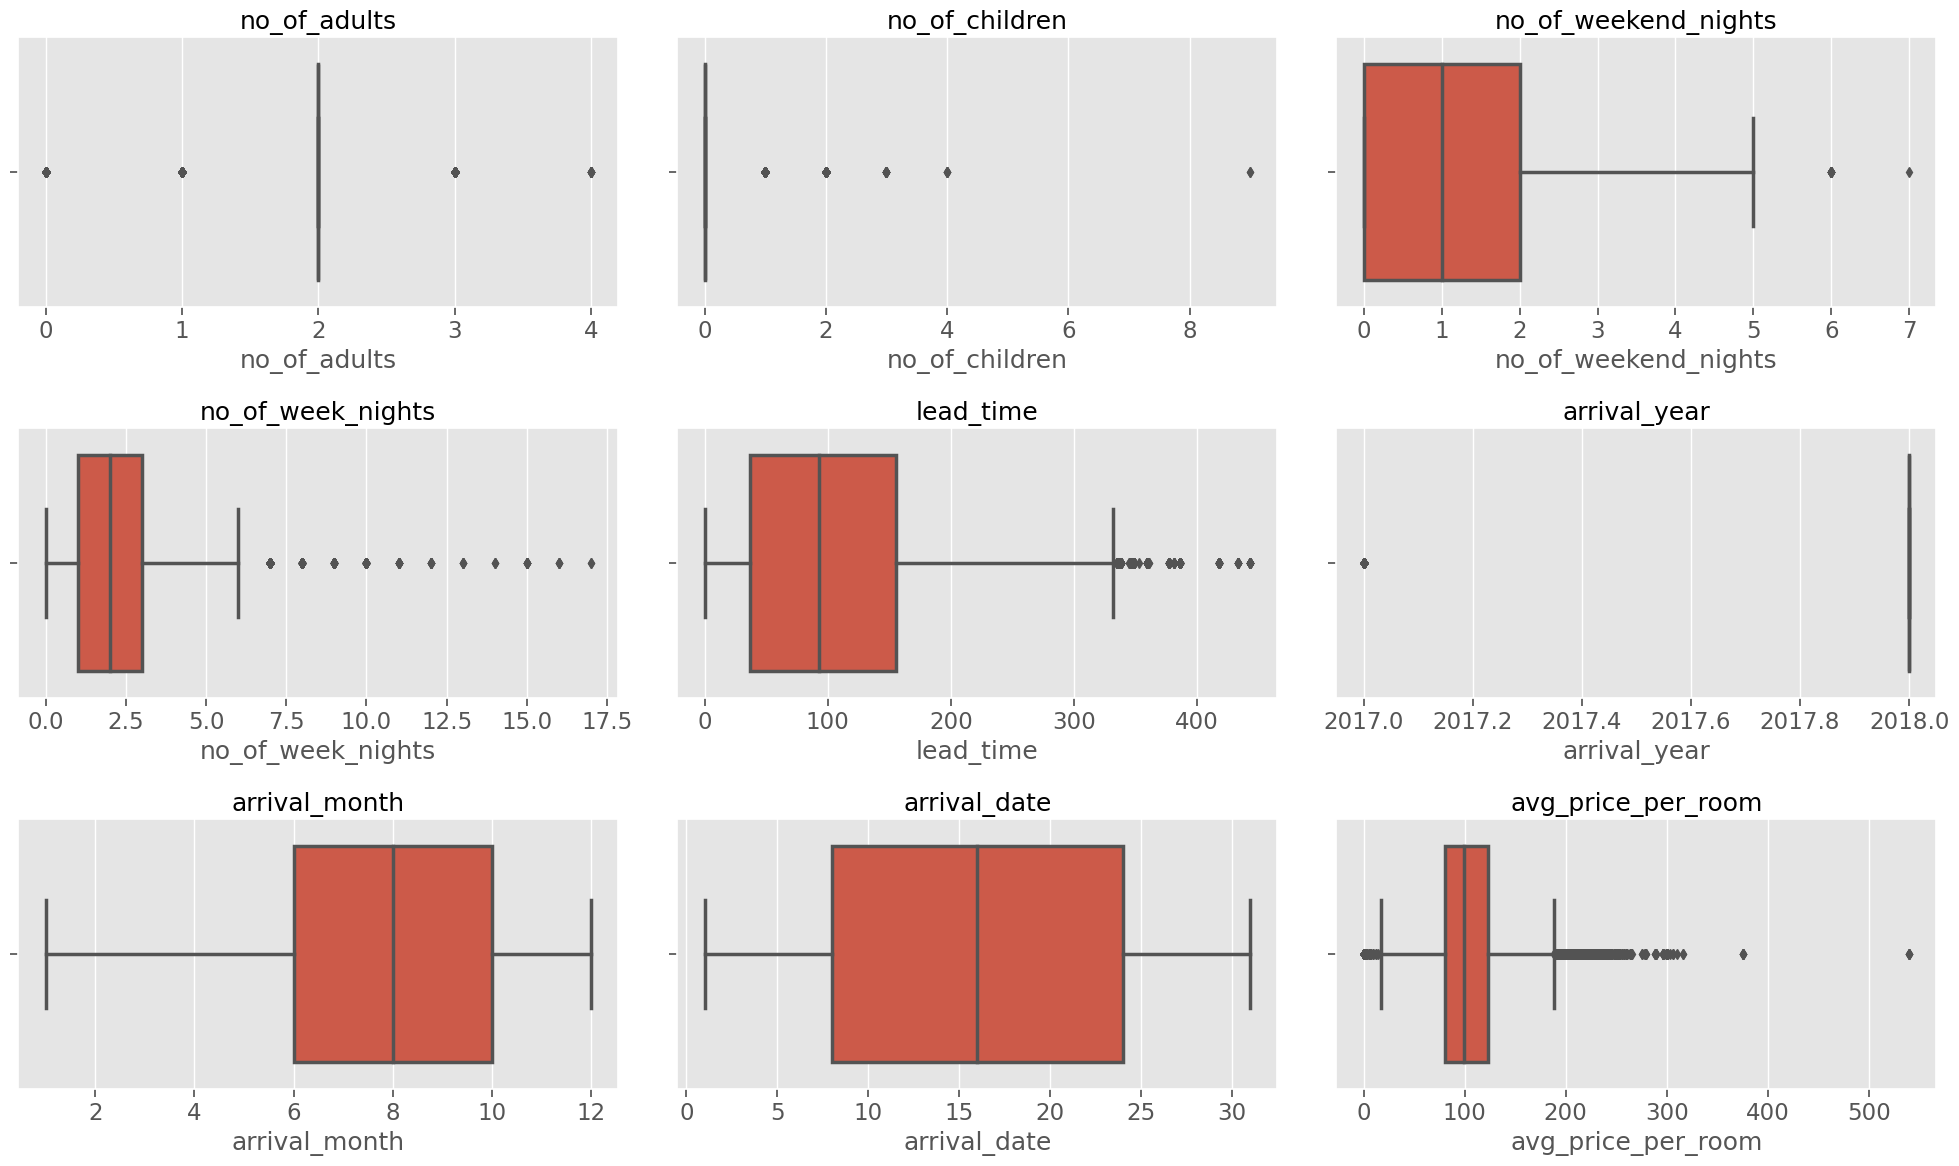

In [5]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
non_cont = non_continuous.copy()
non_cont.append('booking_status')
df_continuous = train.copy().drop(columns=non_cont, axis=1)
df_continuous.describe()
# calculate the number of rows based on the number of columns and 3 plots per row
nrows = int(np.ceil(len(df_continuous.columns)/3))

# create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(20, nrows*4))

# plot the boxplots
for i, column in enumerate(df_continuous.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df_continuous, x=column, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

## 2- histograms



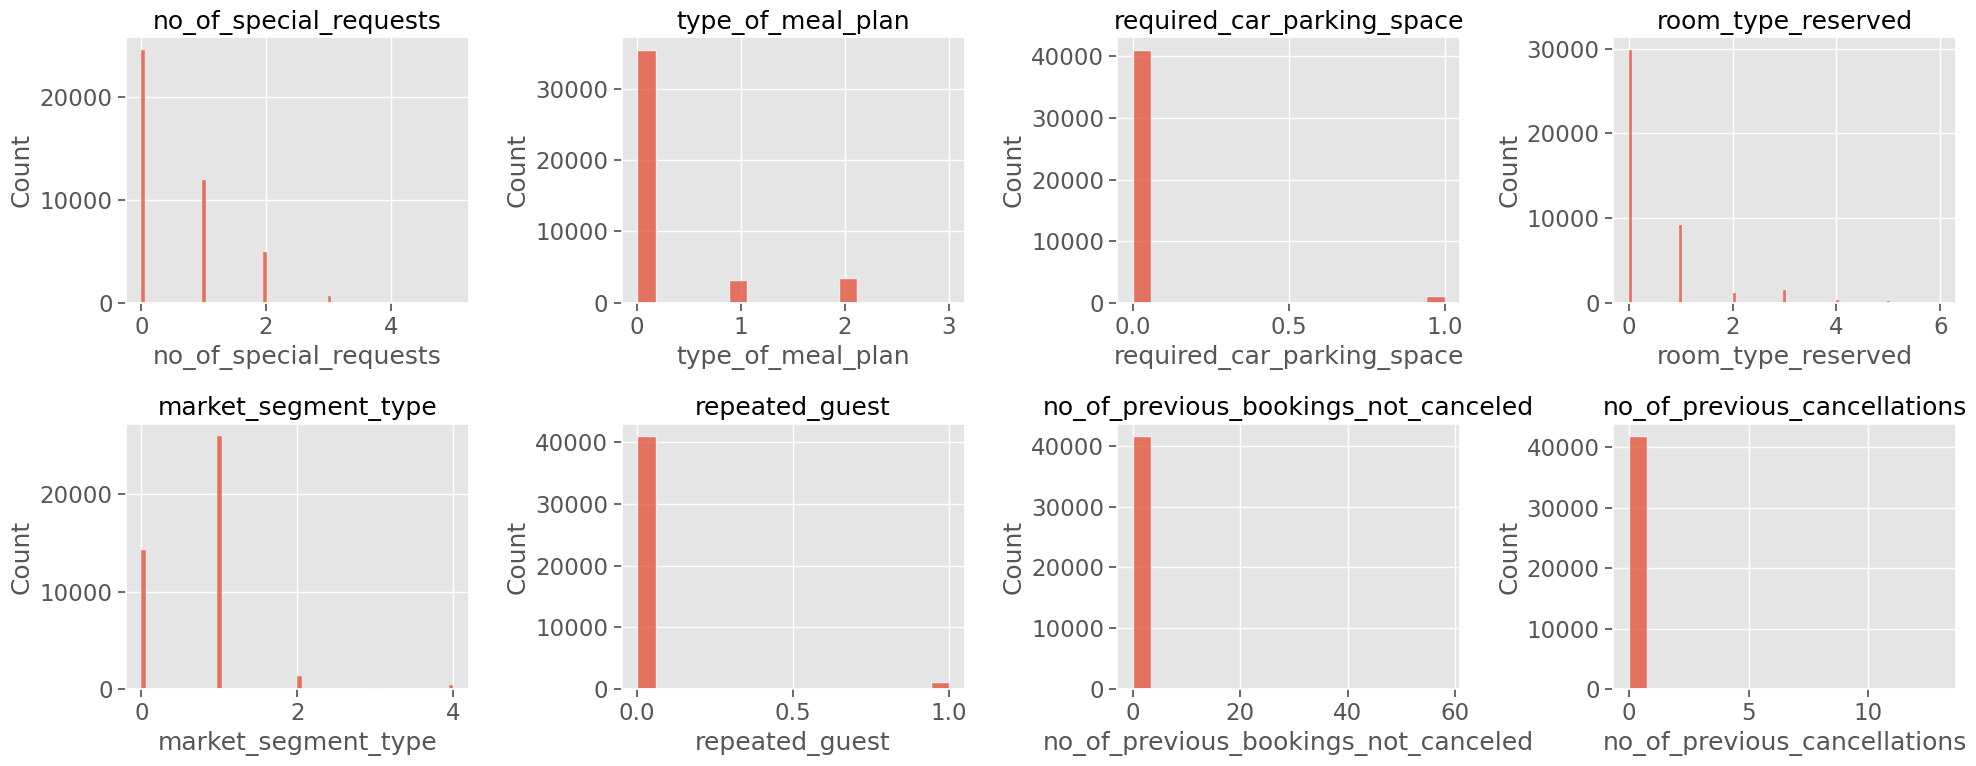

In [6]:
# calculate the number of rows based on the number of columns and 3 plots per row
df_non_continuous = train.copy()[non_continuous]
nrows = int(np.ceil(len(df_non_continuous.columns)/4))
# create the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=4, figsize=(20, nrows*4))

# plot the boxplots
for i, column in enumerate(df_non_continuous.columns):
    row = i // 4
    col = i % 4
    sns.histplot(data=df_non_continuous, x=column, ax=axes[row, col])
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

#### We split the original dataset into two categories, continuous and non-continuous, to visualize the data using box plots for continuous variables and histogram plots for non-continuous variables.

## Removing duplicates

In [7]:
train_copy = train.copy()
print(train_copy.shape)

(42100, 18)


In [8]:
train_dups = train_copy.drop(columns = 'booking_status').duplicated().sum()

print(f'Number of duplicates in training dataset: {train_dups}')

Number of duplicates in training dataset: 562


In [9]:
train_copy = train_copy.drop_duplicates(subset = train.columns[:-1])

In [10]:
print(train_copy.shape)

(41538, 18)


## Removing anomalies

These are the anomalies we noticed:
1. Anomalous dates, such as 29th February
2. Average price per room = 0

In [11]:
# Removing entries where average price of room is 0. This is not possible.
train_copy = train_copy.loc[train_copy['avg_price_per_room'] != 0]
train_copy.shape

(40899, 18)

In [12]:
# Removing anomolous dates
train_copy.rename(columns = {'arrival_year': 'year', 'arrival_month': 'month', 'arrival_date': 'day'}, inplace = True)
train_copy['true_date'] = pd.to_datetime(train_copy[['year', 'month', 'day']], errors = 'coerce')
train_copy = train_copy.dropna()
train_copy = train_copy.drop(columns = 'true_date')
train_copy.shape

(40849, 18)

## Correlation

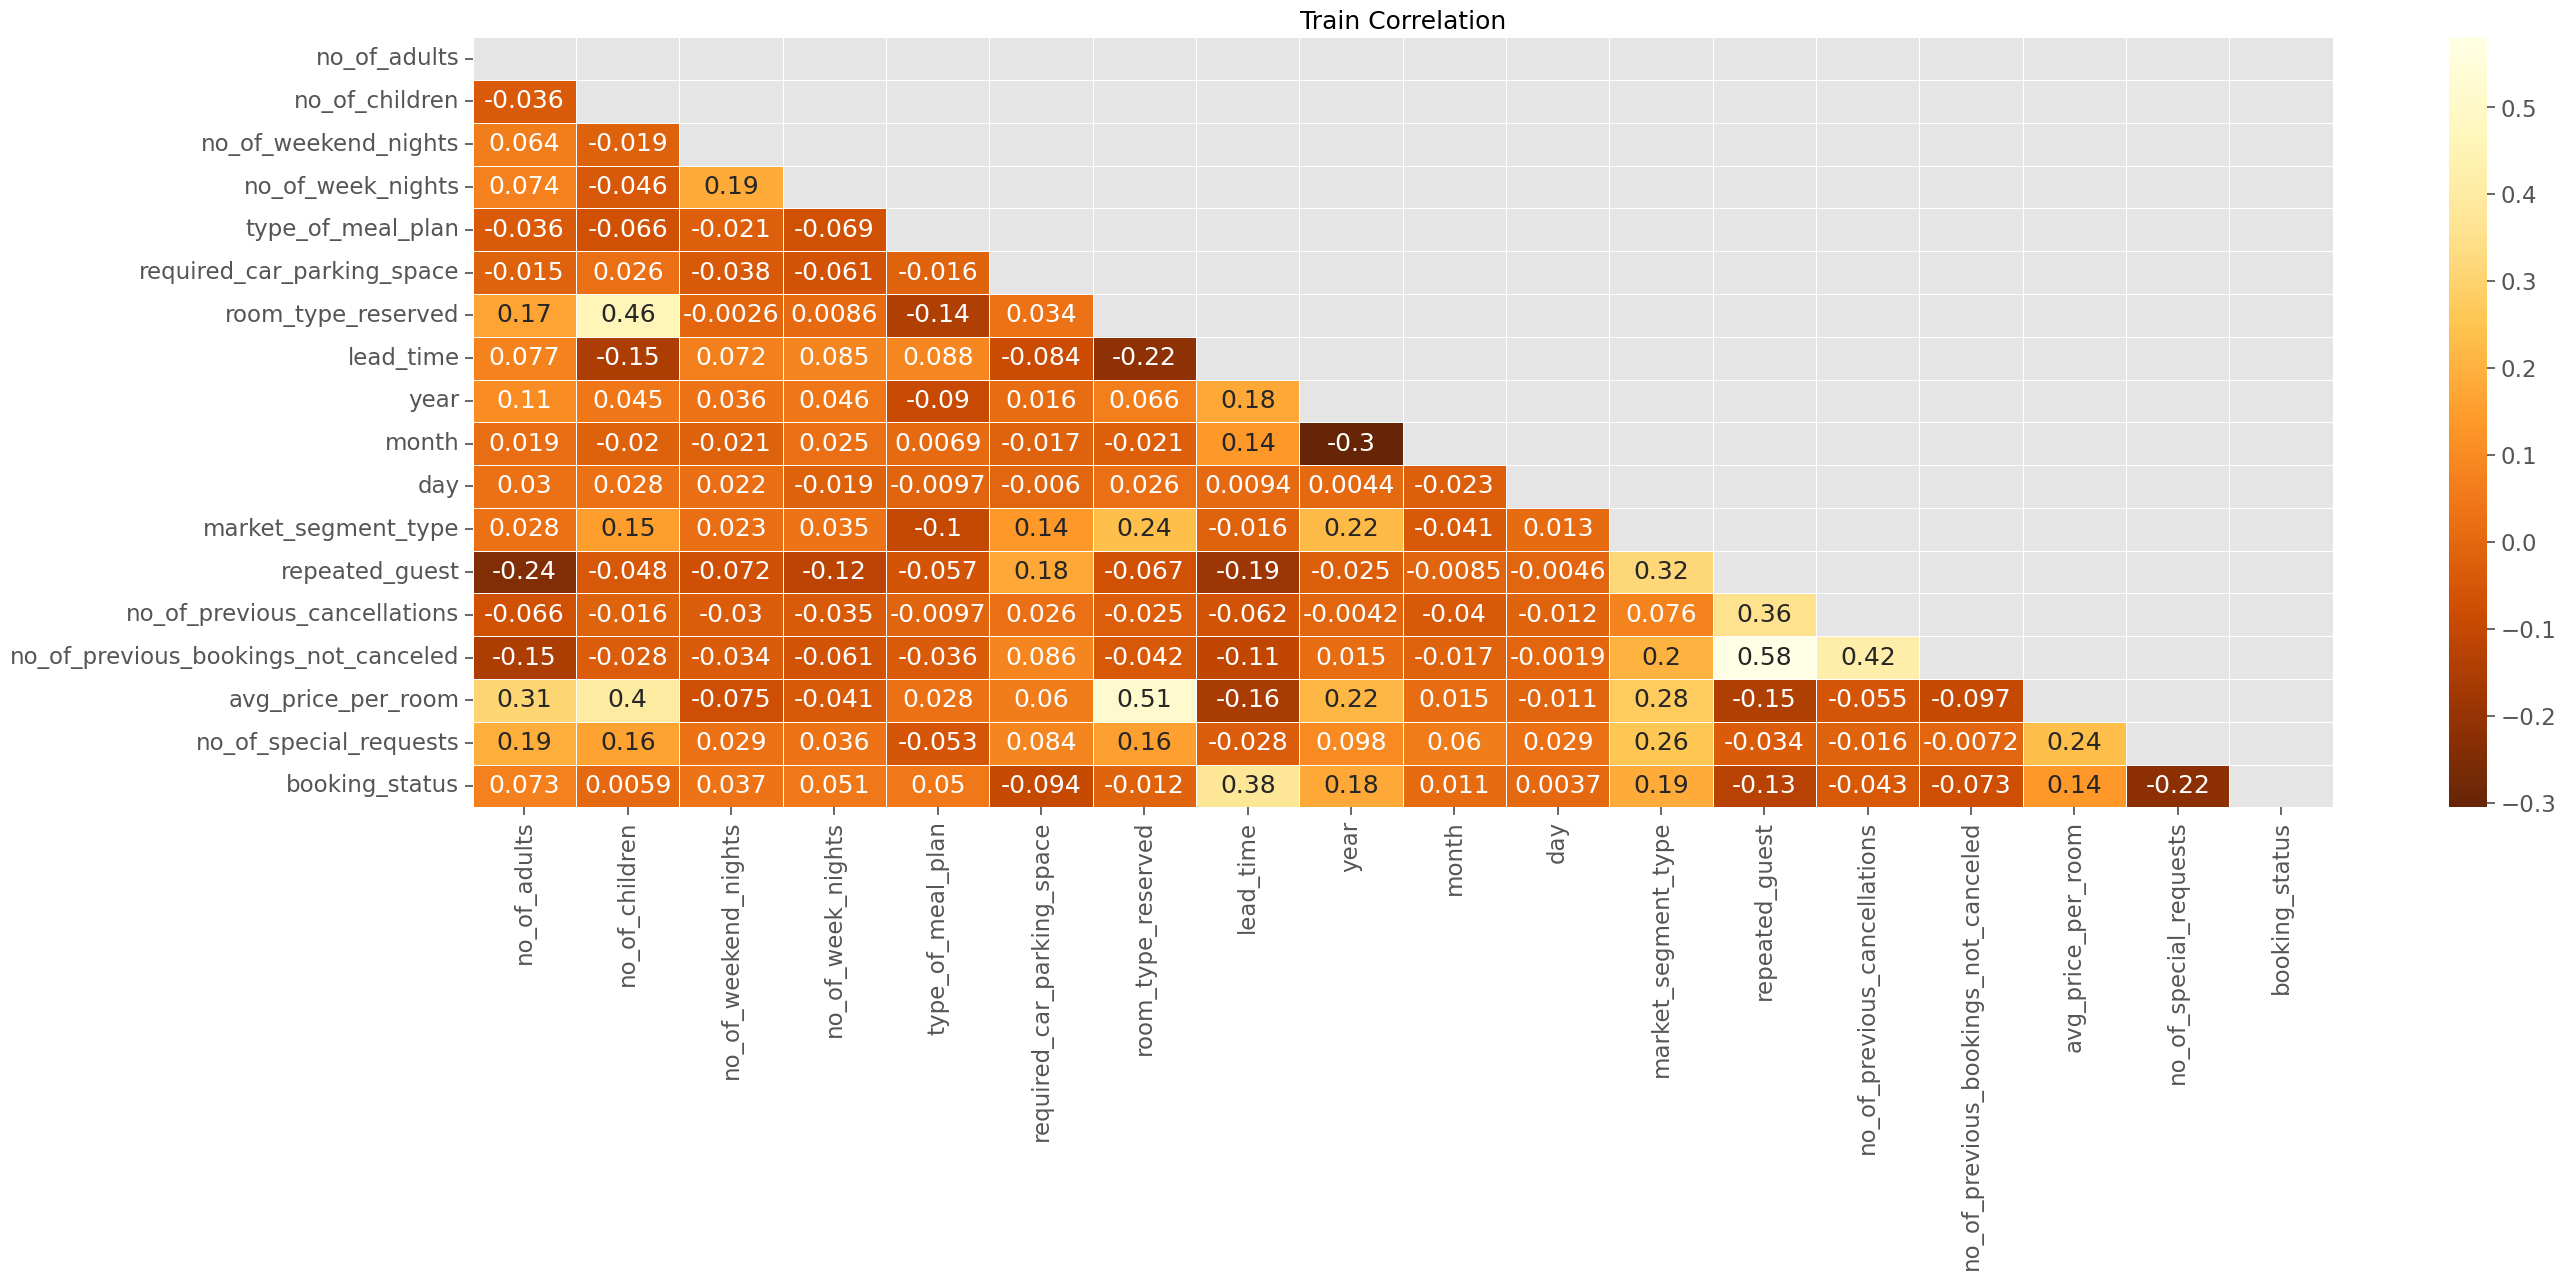

In [13]:
corr = train_copy.corr()
fig, axes = plt.subplots(figsize=(30, 10))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='YlOrBr_r', annot=True)
plt.title('Train Correlation')
plt.show()

## Feature Engineering



In [14]:
num_labels = 10

# Calculate the quantiles for lead time
quantiles = train_copy['lead_time'].quantile([i/num_labels for i in range(1, num_labels)])

# Extract the quantile values
label_thresholds = quantiles.tolist()

# Create a new column 'lead_time_category' and assign numerical labels based on lead time
train_copy['lead_time_category'] = pd.cut(train_copy['lead_time'], bins=[-float('inf')] + label_thresholds + [float('inf')],
                                          labels=range(num_labels), include_lowest=True).astype(int)

train_copy = train_copy.drop(columns = 'lead_time')

In [15]:
train_copy.shape

(40849, 18)

**From the heatmap above, we infer the following:**
1. Booking status is most correlated to lead time, i.e. The further ahead in time the room is booked, the more likely it is to be cancelled
2. Number of children is closely related to room type reserved as more children would mean larger rooms
3. Consequently, the average price per room is also correlated to number of children as larger rooms would have higher price
4. Unsurprisingly, the room type reservered is related to average price per room
5. If guest is a repeat guest, then naturally the number of previous bookings not cancelled will be high.

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [17]:
train = train_copy.copy()
train.shape

(40849, 18)

In [18]:
X_original = train.drop("booking_status", axis=1)
y_original = train['booking_status']
X_train, X_test, y_train, y_test = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
print("Shapes:")
print(" X_train: ",X_train.shape)
print(" X_test: ",X_test.shape)
print(" y_train: ",y_train.shape)
print(" y_test: ",y_test.shape)

Shapes:
 X_train:  (32679, 17)
 X_test:  (8170, 17)
 y_train:  (32679,)
 y_test:  (8170,)


In [19]:
X_train['lead_time_category']

26420    3
13927    1
28665    8
21626    7
31683    4
        ..
6383     8
11491    7
39283    4
868      0
16122    1
Name: lead_time_category, Length: 32679, dtype: int32

## ANN


In [20]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('./playground-series-s3e7/train.csv').drop(columns='id')

# Split the dataset into input features and target variable
X = data.drop("booking_status", axis=1)  # Input features
y = data["booking_status"]  # Target variable

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
best_model = None
best_accuracy = 0
best_lr = 0

for lr in [0.0001, 0.001,0.01,0.1,1]:
    
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    optimizer=tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    model.fit(X_train_scaled, y_train, epochs=20,batch_size=32,verbose=0)
    acc = model.evaluate(X_train_scaled,  y_train, verbose=2)[1]
    print("Learning rate", lr, "Training Accuracy", acc)
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model
        best_lr = lr

acc = best_model.evaluate(X_test_scaled,  y_test, verbose=2)[1]
print("best learning rate", best_lr, "Testing Accuracy", acc)

1053/1053 - 1s - loss: 0.4592 - accuracy: 0.7839 - 754ms/epoch - 716us/step
Learning rate 0.0001 Training Accuracy 0.7839370369911194
1053/1053 - 1s - loss: 0.4387 - accuracy: 0.7976 - 697ms/epoch - 662us/step
Learning rate 0.001 Training Accuracy 0.7975950241088867
1053/1053 - 1s - loss: 0.4338 - accuracy: 0.8037 - 697ms/epoch - 662us/step
Learning rate 0.01 Training Accuracy 0.8036520481109619
1053/1053 - 1s - loss: 0.5496 - accuracy: 0.7175 - 696ms/epoch - 661us/step
Learning rate 0.1 Training Accuracy 0.7175177931785583
1053/1053 - 1s - loss: 0.7629 - accuracy: 0.6071 - 702ms/epoch - 666us/step
Learning rate 1 Training Accuracy 0.6070961952209473
264/264 - 0s - loss: 0.4391 - accuracy: 0.8046 - 170ms/epoch - 646us/step
best learning rate 0.01 Testing Accuracy 0.8046318292617798


## Decision Trees

In [21]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Training Accuracy:", tree_clf.score(X_train, y_train))

Training Accuracy: 0.9892517814726841


**Decsion tree predictions on X_test**

In [22]:
y_pred = tree_clf.predict(X_test)
print("Predicted Labels:", y_pred[:30])
print("True Labels:     ", y_test.to_numpy()[:30])
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Predicted Labels: [0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0]
True Labels:      [0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 1 0 0]
Testing Accuracy: 0.7421615201900238


**Confusion Matrix for Decision tree classifier**

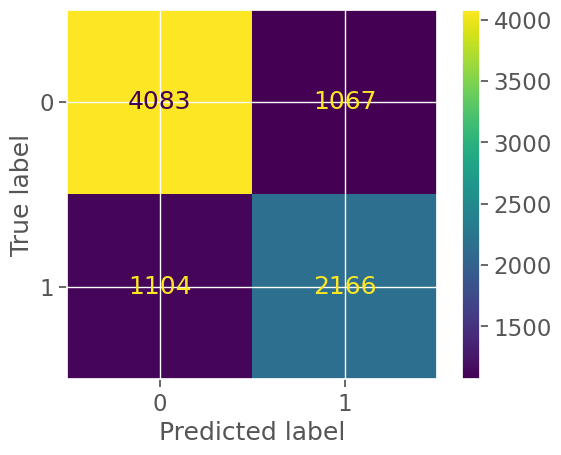

In [23]:
matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=tree_clf.classes_)
disp.plot()
plt.show()

**Cross Validation**

In [24]:
scores = cross_val_score(tree_clf, X_train, y_train, cv=50)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.73738872 0.71661721 0.73738872 0.73442136 0.74035608 0.74925816
 0.7611276  0.71216617 0.71068249 0.7537092  0.7462908  0.7611276
 0.69881306 0.75667656 0.71364985 0.75816024 0.72551929 0.75667656
 0.72106825 0.73590504 0.7388724  0.72848665 0.75964392 0.71068249
 0.75074184 0.74183976 0.71216617 0.77893175 0.74925816 0.73442136
 0.72213967 0.72511144 0.75780089 0.73254086 0.7667162  0.72808321
 0.73402675 0.74591382 0.73997028 0.76374443 0.73997028 0.76968796
 0.74591382 0.73551263 0.72956909 0.72956909 0.76374443 0.72956909
 0.70282318 0.72659733]
0.74 accuracy with a standard deviation of 0.02


**Using GridSearchCV to find hyperparameters**

In [25]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10, 20, 40],
    'min_samples_leaf': [1, 2, 5, 10],
}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                              params,
                              cv=3)

grid_search_cv.fit(X_train, y_train)

y_pred = grid_search_cv.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))

tree_clf = grid_search_cv.best_estimator_
print("Criterion:         ", tree_clf.criterion)
print("Min Samples Leaf:  ", tree_clf.min_samples_leaf)
print("Depth:             ", tree_clf.max_depth)
print("Min Samples Split: ", tree_clf.min_samples_split)

Accuracy:  0.8086698337292162
Criterion:          gini
Min Samples Leaf:   5
Depth:              10
Min Samples Split:  40


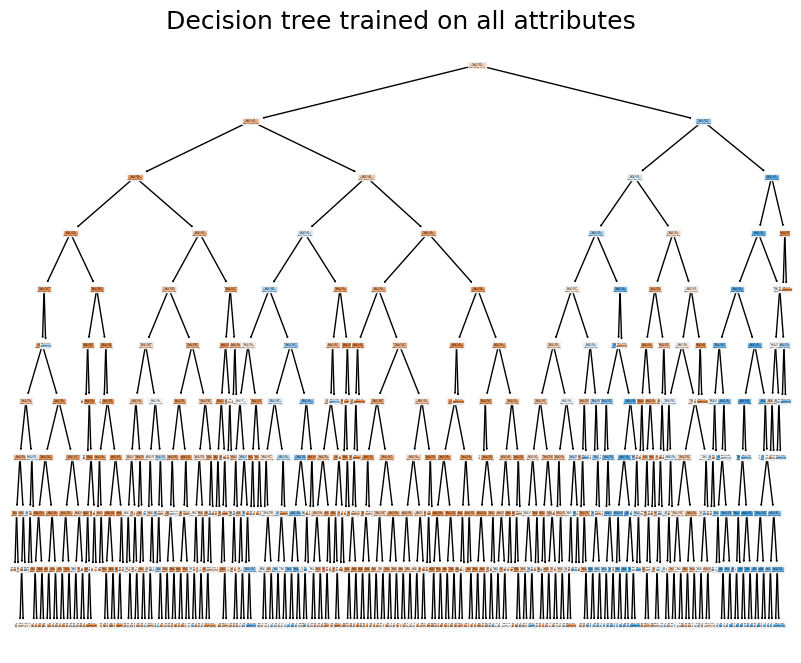

In [26]:
plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True)
plt.title("Decision tree trained on all attributes")
plt.show()

**Random Forest Classifier**

In [27]:
randomForest_clf = RandomForestClassifier(n_estimators=200, random_state=42,max_samples=5000)
randomForest_clf.fit(X_train, y_train)
print("Accuracy:",randomForest_clf.score(X_test, y_test))

Accuracy: 0.8184085510688837


## K-Nearest Neighbours

In [28]:
model = KNeighborsClassifier(n_neighbors=20)
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

Testing Accuracy: 0.7475059382422803


In [29]:
scores = cross_val_score(model, X_train, y_train, cv=50)
print(scores)

print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.75519288 0.74925816 0.74183976 0.75816024 0.72997033 0.73738872
 0.73590504 0.71810089 0.72403561 0.76409496 0.72700297 0.73590504
 0.73738872 0.73293769 0.72403561 0.74925816 0.75964392 0.73738872
 0.72106825 0.78338279 0.74332344 0.70919881 0.74332344 0.73590504
 0.73590504 0.74777448 0.73145401 0.75519288 0.7462908  0.73738872
 0.73105498 0.76077266 0.72956909 0.75185736 0.73699851 0.72213967
 0.74888559 0.73997028 0.73997028 0.7756315  0.7384844  0.75334324
 0.75037147 0.71471025 0.72956909 0.73105498 0.72362556 0.7191679
 0.75185736 0.75185736]
0.74 accuracy with a standard deviation of 0.02


## Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_train)


lin_reg = LogisticRegression(max_iter=1000)
lin_reg.fit(X_scaled, y_train)
print(lin_reg.intercept_)
print(lin_reg.coef_)
y_pred= lin_reg.predict(X_test)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Testing Precision:", metrics.precision_score(y_test, y_pred))
print("Testing Recall:", metrics.recall_score(y_test, y_pred))
print("Testing f1 Score:", metrics.f1_score(y_test, y_pred))


[-0.71736091]
[[ 0.0326679   0.02551263  0.07398641  0.02140615  0.03567856 -0.25054328
  -0.23291439  0.96286091  0.17468195 -0.02553735  0.02488124  0.73735337
  -0.76914191  0.03817393  0.00649094  0.70004267 -0.92205223]]
Testing Accuracy: 0.38836104513064135
Testing Precision: 0.38836104513064135
Testing Recall: 1.0
Testing f1 Score: 0.5594525235243798


C:\Users\arify\anaconda3\envs\cmps460\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# XGBoost Trees Classifier

XGBoost Trees Classifier
Since highest accuracy in phase 1 was acheived with Random Forest Classifier, which is based on Decision Trees, we are trying another boosted trees algorithm: XGboost or eXtreme Gradient Boost. Adapted from: https://www.youtube.com/watch?v=GrJP9FLV3FE


### Using GridSearchCV to try different hyperparameters

In [31]:
params = {
    'max_depth' : [3,4,5],
    'learning_rate': [0.1,0.2,0.3],
    'gamma' : [0, 0.5, 1],
    'reg_lambda' : [10, 15, 20],
}
​
grid_search_cv = GridSearchCV(estimator=XGBClassifier(n_estimators = 200, objective="binary:logistic", seed=42, subsample=0.9, colsample_bytree=0.67),
                             param_grid = params,
                             cv = 3,
                             verbose=2,
                             scoring='accuracy',
                             n_jobs = -1
                             )
​
grid_search_cv.fit(X_train, y_train)
​
y_pred = grid_search_cv.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

SyntaxError: invalid non-printable character U+200B (4065301929.py, line 7)

In [ ]:
xgb_clf = grid_search_cv.best_estimator_
print("Max Depth:         ", xgb_clf.max_depth)
print("Learning Rate:     ", xgb_clf.learning_rate)
print("Gamma:             ", xgb_clf.gamma)
print("Reg Lambda:        ", xgb_clf.reg_lambda)

**Since best parameters are in the middle choosing the same and trying with more estimators**

In [ ]:
model = XGBClassifier(n_estimators=2000, n_jobs=-1, max_depth=4, eta=0.2).set_params(early_stopping_rounds=300, reg_lambda=15)

watchlist = [(X_test, y_test)]

model.fit(X_train, y_train, eval_set=watchlist, verbose=2)

y_pred = model.predict(X_test)
print("\n\nTesting Accuracy:",accuracy_score(y_test, y_pred))

Even after trying multiple different hyperparamaters only a slight improvement; .7% over the RF classifier

In [ ]:
matrix = confusion_matrix(y_test, y_pred) 
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=tree_clf.classes_)
disp.plot()
plt.grid(None)
plt.show()

# CatBoost Classifier

In [ ]:
from catboost import CatBoostClassifier

cat_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]

cb_clf = CatBoostClassifier(iterations=500, task_type="GPU", learning_rate=0.02, random_state=42, eval_metric='Accuracy')

cb_clf.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_test, y_test))

y_pred = cb_clf.predict(X_test)
print("\n\nTesting Accuracy:",accuracy_score(y_test, y_pred))

Conclusion
====
In conclusion, our data analysis for the hotel reservation cancellation dataset has been successful. Using the summary statistics and visualization has helped us to uncover patterns and relationships in the data such as the correlation between the number of special requests and the booking status. Another interesting relationship was that of lead time and booking status. We also noticed some anomalies such as rows that had the same attributes but different class labels and removed them to better clean our data. Investigating these relationships has provided us with a better understanding of customer behaviour and what factors influence it. By training initial models we have also established a solid foundation upon which we can have future developments and improvements.